In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import math
from sklearn import metrics

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 1000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
7300591,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7023S,05/05/2012 11:15:44 AM,05/05/2012 11:30:01 AM,857,LZ 15M M-SAT 7:30-19:30,0,1346,5194
6090037,Supreme,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3006,27/03/2012 11:38:59 AM,27/03/2012 12:33:48 PM,3289,1P MTR M-SAT 7:30-19:30,0,894,2021
2351992,Regency,EXHIBITION STREET,LA TROBE STREET,Lt LONSDALE STREET,1,C640,05/12/2011 11:21:14 AM,05/12/2011 11:34:13 AM,779,2P MTR M-SAT 7:30-20:30,0,647,335
11258689,The Mac,ELIZABETH STREET,FRANKLIN STREET,A'BECKETT STREET,2,4384E,01/09/2012 01:37:32 PM,01/09/2012 02:26:43 PM,2951,1P MTR M-SAT 7:30-19:30,0,627,3336
8597515,RACV,QUEEN STREET,BOURKE STREET,Lt COLLINS STREET,2,1110E,14/06/2012 09:22:19 AM,14/06/2012 09:38:22 AM,963,1/2P MTR M-F 7:30-16:30,0,1171,692


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
6516353,Hardware,QUEEN STREET,LONSDALE STREET,Lt BOURKE STREET,1,C1166,10/04/2012 01:47:21 PM,10/04/2012 02:58:18 PM,4257,1P MTR M-SAT 7:30-19:30,1,1171,647
1563470,Queensberry,VICTORIA STREET,HOWARD STREET,CAPEL STREET,3,7580N,13/11/2011 05:00:03 PM,13/11/2011 05:05:41 PM,338,2P SUN 7:30-18:30,0,1381,3980
2364307,Princes Theatre,EXHIBITION STREET,LONSDALE STREET,Lt BOURKE STREET,5,487W,05/12/2011 03:03:05 PM,05/12/2011 03:19:17 PM,972,1P MTR M-SAT 7:30-19:30,0,647,163
4800066,Southbank,DORCAS STREET,KINGS WAY,DODDS STREET,3,9192N,17/02/2012 11:25:00 AM,17/02/2012 11:26:53 AM,113,LZ 15M M-F 7:30-18:30,0,597,4855
6779468,Hyatt,Lt COLLINS STREET,EXHIBITION STREET,SPRING STREET,4,2123S,18/04/2012 02:45:34 PM,18/04/2012 03:03:17 PM,1063,1P MTR M-SAT 7:30-19:30,0,911,1083


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1034
Princes Theatre     714
Victoria Market     703
Regency             674
Southbank           620
Hyatt               585
The Mac             580
Titles              561
Rialto              464
County              426
City Square         411
Banks               404
Courtney            392
Hardware            392
Chinatown           379
Spencer             359
Magistrates         349
RACV                337
Jolimont            319
Supreme             192
Tavistock            55
Docklands            47
West Melbourne        3
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
7300591,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7023S,05/05/2012 11:15:44 AM,05/05/2012 11:30:01 AM,857,LZ 15M M-SAT 7:30-19:30,0,1346,5194
6090037,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3006,27/03/2012 11:38:59 AM,27/03/2012 12:33:48 PM,3289,1P MTR M-SAT 7:30-19:30,0,894,2021
2351992,REGENCY,EXHIBITION STREET,LA TROBE STREET,LT LONSDALE STREET,1,C640,05/12/2011 11:21:14 AM,05/12/2011 11:34:13 AM,779,2P MTR M-SAT 7:30-20:30,0,647,335
11258689,THE MAC,ELIZABETH STREET,FRANKLIN STREET,A'BECKETT STREET,2,4384E,01/09/2012 01:37:32 PM,01/09/2012 02:26:43 PM,2951,1P MTR M-SAT 7:30-19:30,0,627,3336
8597515,RACV,QUEEN STREET,BOURKE STREET,LT COLLINS STREET,2,1110E,14/06/2012 09:22:19 AM,14/06/2012 09:38:22 AM,963,1/2P MTR M-F 7:30-16:30,0,1171,692


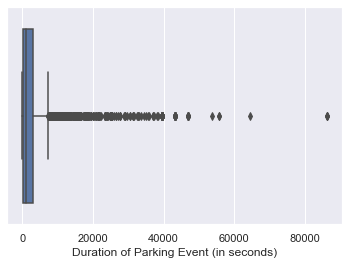

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             933
QUEEN STREET                743
LA TROBE STREET             577
EXHIBITION STREET           563
FRANKLIN STREET             541
COLLINS STREET              521
RUSSELL STREET              483
ELIZABETH STREET            476
BOURKE STREET               427
LT LONSDALE STREET          329
LT COLLINS STREET           314
FLINDERS LANE               291
SPRING STREET               289
KING STREET                 276
ERROL STREET                262
WILLIAM STREET              213
LT BOURKE STREET            178
COVENTRY STREET             167
VICTORIA STREET             137
A'BECKETT STREET            135
FLINDERS STREET             134
SPENCER STREET              119
ALBERT STREET               118
QUEENSBERRY STREET          115
CAPEL STREET                102
THERRY STREET                96
DORCAS STREET                89
GRANT STREET                 89
O'CONNELL STREET             76
COBDEN STREET                69
KAVANAGH STREET              69
LEVESON 

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            881
QUEEN STREET           824
QUEENSBERRY STREET     672
WILLIAM STREET         666
RUSSELL STREET         532
SPENCER STREET         481
EXHIBITION STREET      459
SWANSTON STREET        447
LT LONSDALE STREET     420
LONSDALE STREET        390
LT COLLINS STREET      357
VICTORIA STREET        308
COLLINS STREET         294
BOURKE STREET          268
ELIZABETH STREET       246
LT BOURKE STREET       220
LA TROBE STREET        190
FLINDERS LANE          188
WILLAM STREET          151
FRANKLIN STREET        149
THERRY STREET          146
WELLS STREET           122
A'BECKETT STREET       117
STURT STREET            98
DODDS STREET            96
FLINDERS STREET         92
O'CONNELL STREET        88
KINGS WAY               84
SOUTHBANK BOULEVARD     80
ERROL STREET            73
VICTORIA PARADE         62
HOWARD STREET           61
PELHAM STREET           58
PEEL STREET             56
BALSTON STREET          52
ALBERT STREET           48
COBDEN STREET           46
G

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         851
ELIZABETH STREET       848
VICTORIA STREET        834
QUEEN STREET           806
EXHIBITION STREET      518
KING STREET            481
SPRING STREET          462
LONSDALE STREET        448
LT BOURKE STREET       390
FLINDERS LANE          386
RUSSELL STREET         380
COLLINS STREET         357
LT COLLINS STREET      268
SWANSTON STREET        246
LA TROBE STREET        242
LT LONSDALE STREET     224
BOURKE STREET          220
FLINDERS STREET        188
DODDS STREET           151
FRANKLIN STREET        146
ST KILDA ROAD          122
LANSDOWNE STREET       113
QUEENSBERRY STREET      95
A'BECKETT STREET        88
POWER STREET            76
LEVESON STREET          73
WELLS STREET            71
THERRY STREET           62
CAPEL STREET            57
WALSH STREET            56
HAWKE STREET            47
STURT STREET            46
STANLEY STREET          45
MILES STREET            45
ELM STREET              41
GISBORNE STREET         37
DUDLEY STREET           35
K

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
7300591,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7023S,2012-05-05 11:15:44,2012-05-05 11:30:01,857,LZ 15M M-SAT 7:30-19:30,0,1346,5194
6090037,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,1,C3006,2012-03-27 11:38:59,2012-03-27 12:33:48,3289,1P MTR M-SAT 7:30-19:30,0,894,2021
2351992,REGENCY,EXHIBITION STREET,LA TROBE STREET,LT LONSDALE STREET,1,C640,2011-05-12 11:21:14,2011-05-12 11:34:13,779,2P MTR M-SAT 7:30-20:30,0,647,335
11258689,THE MAC,ELIZABETH STREET,FRANKLIN STREET,A'BECKETT STREET,2,4384E,2012-01-09 13:37:32,2012-01-09 14:26:43,2951,1P MTR M-SAT 7:30-19:30,0,627,3336
8597515,RACV,QUEEN STREET,BOURKE STREET,LT COLLINS STREET,2,1110E,2012-06-14 09:22:19,2012-06-14 09:38:22,963,1/2P MTR M-F 7:30-16:30,0,1171,692


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
6516353,HARDWARE,QUEEN STREET,LONSDALE STREET,LT BOURKE STREET,1,C1166,2012-10-04 13:47:21,2012-10-04 14:58:18,4257,1P MTR M-SAT 7:30-19:30,1,1171,647
1563470,QUEENSBERRY,VICTORIA STREET,HOWARD STREET,CAPEL STREET,3,7580N,2011-11-13 17:00:03,2011-11-13 17:05:41,338,2P SUN 7:30-18:30,0,1381,3980
2364307,PRINCES THEATRE,EXHIBITION STREET,LONSDALE STREET,LT BOURKE STREET,5,487W,2011-05-12 15:03:05,2011-05-12 15:19:17,972,1P MTR M-SAT 7:30-19:30,0,647,163
4800066,SOUTHBANK,DORCAS STREET,KINGS WAY,DODDS STREET,3,9192N,2012-02-17 11:25:00,2012-02-17 11:26:53,113,LZ 15M M-F 7:30-18:30,0,597,4855
6779468,HYATT,LT COLLINS STREET,EXHIBITION STREET,SPRING STREET,4,2123S,2012-04-18 14:45:34,2012-04-18 15:03:17,1063,1P MTR M-SAT 7:30-19:30,0,911,1083


### KNN Classification Model on Predicitive Analytics question 2

In [19]:
#Target field identification
duration = parkingdata['Duration of Parking Event (in seconds)'].copy()

print('Minimum parking duration (seconds): ' + str(duration.min()))
print('Maximum parking duration (seconds): ' + str(duration.max()))
print('\nMinimum parking duration (hour): ' + str(duration.min()/3600))
print('Maximum parking duration (hour): ' + str(duration.max()/3600))
print('\nMinimum parking duration is under [' + str(math.trunc(duration.min()/3600) + 1) + '] hours')
print('Maximum parking duration is under [' + str(math.trunc(duration.max()/3600) + 1) + '] hours')

durList = []
static = 1
df = pd.DataFrame()

for record in duration.values:
    hour = 3600
    index = 0
    while static == 1:
        if record < hour:
#             print("\nDuration in seconds: " + str(record))
            data = math.trunc(record/3600) + 1
            durList.append(data)
#             print("Duration is under " + str(data) + " hours")
            break
        else:
            hour += 3600

df.insert(0, 'Duration (Hours)', durList, True)
target = df['Duration (Hours)']
target.head(10)

Minimum parking duration (seconds): 1
Maximum parking duration (seconds): 86264

Minimum parking duration (hour): 0.0002777777777777778
Maximum parking duration (hour): 23.962222222222223

Minimum parking duration is under [1] hours
Maximum parking duration is under [24] hours


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Duration (Hours), dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Street ID,Device ID,Arrival Hour
7300591,0,0,0,0,0,0,4,1346,5194,11
6090037,1,1,1,1,1,0,1,894,2021,11
2351992,2,2,2,2,2,0,1,647,335,11
11258689,3,3,3,3,1,0,2,627,3336,13
8597515,4,4,4,4,3,0,2,1171,692,9
11646229,5,5,5,5,1,0,4,123,1447,12
1523205,6,6,6,6,1,0,3,528,1082,9
1198554,7,7,4,4,1,0,1,1221,440,15
8683219,0,8,7,1,2,0,1,681,6071,11
1302685,5,9,5,5,4,0,4,670,1157,17


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 85.5min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 9,
 'p': 5,
 'weights': 'uniform'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 9
Best weights: uniform
Best algorithm: brute
Best leaf_size: 10
Best p: 5


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.6919
1,auto,10,1,1,distance,0.6919
2,auto,10,1,2,uniform,0.6848
3,auto,10,1,2,distance,0.6848
4,auto,10,1,5,uniform,0.6830
5,auto,10,1,5,distance,0.6830
6,auto,10,2,1,uniform,0.7730
7,auto,10,2,1,distance,0.7009
8,auto,10,2,2,uniform,0.7718
9,auto,10,2,2,distance,0.6885


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.791
Score with 2 selected features: 0.791
Score with 3 selected features: 0.8205

Indexs of the desired features
[2, 0, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Area Name,In Violation?
7300591,0,0,0
6090037,1,1,0
2351992,2,2,0
11258689,3,3,0
8597515,4,4,0
11646229,5,5,0
1523205,6,6,0
1198554,4,7,0
8683219,7,0,0
1302685,5,5,0


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2450 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 32.2min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 40,
 'n_neighbors': 8,
 'p': 1,
 'weights': 'distance'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 8
Best weights: distance
Best algorithm: auto
Best leaf_size: 40
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.7528
1,auto,10,1,1,distance,0.7528
2,auto,10,1,2,uniform,0.7526
3,auto,10,1,2,distance,0.7526
4,auto,10,1,5,uniform,0.7526
5,auto,10,1,5,distance,0.7526
6,auto,10,2,1,uniform,0.8063
7,auto,10,2,1,distance,0.8076
8,auto,10,2,2,uniform,0.8064
9,auto,10,2,2,distance,0.8074


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[3892   86    4    7    0    0    0    0    1    0    0    0    1    0
     0]
 [ 511  196    8    7    0    0    0    0    0    0    0    0    0    0
     0]
 [  67   51   34   10    0    0    0    0    1    0    0    0    2    0
     0]
 [  19    8    6    3    1    0    0    0    0    0    0    0    0    0
     0]
 [   3   10    4    3    1    0    0    0    0    0    0    0    0    0
     0]
 [   3    4    1    0    1    0    0    0    0    0    0    0    0    0
     0]
 [   2    7    1    0    0    0    1    0    0    0    0    0    0    0
     0]
 [   2    2    2    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   1    1    2    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    1    0    1    0    0    0    0    0    0    0    0    0    0
     0]
 [   5    9    1    3    0    0    0    0    0    0    0    0    0    0
     0]
 [   6    2    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    3    0  


 Accuracy score: 0.82540

 Misclassification Rate: 0.12743

 True Positive Rate: 0.27723

 True Negative Rate: 0.97838

 Precision : 0.69504

 Prevalence : 0.15091

 F score : 0.39636

 False Positive Rate: 0.02162


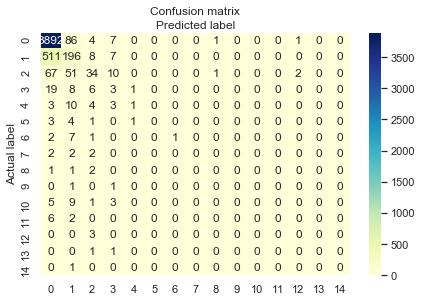

In [36]:
#Name of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

#Printing the numerical result of the confusion matrix
print("\n Accuracy score: {:.5f}".format(knn.score(x_test, y_test)))
misclassification_error = (FP + FN) / float(TP + TN + FP + FN)
print("\n Misclassification Rate: {:.5f}".format(misclassification_error))
sensitivity = TP / float(FN + TP)
print("\n True Positive Rate: {:.5f}".format(sensitivity))
specificity = TN / (TN + FP)
print("\n True Negative Rate: {:.5f}".format(specificity))
precision = TP / float(TP + FP)
print("\n Precision : {:.5f}".format(precision))
prevalence =  float(FN + TP)/float(TP + TN + FP + FN)
print("\n Prevalence : {:.5f}".format(prevalence))
fscore = (2 * precision * sensitivity) / (precision + sensitivity)
print("\n F score : {:.5f}".format(fscore))
print("\n False Positive Rate: {:.5f}".format(1-specificity))

In [37]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.83150
[fold 1] score: 0.82450
[fold 2] score: 0.82700
[fold 3] score: 0.82200
[fold 4] score: 0.82100

KNN mean score [5 folds] = 0.8252


In [ ]:
0.831